## Graph Convolutions For SIDER

In [ ]:
Featurization=ConvMolFeaturizer

É utilizado com modelos GraphConvModel.

Alternativamente, também implementamos este modelo (GraphConvModel) usando layers do TensorGraph

In [13]:
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import numpy as np
import tensorflow as tf
import deepchem as dc
from deepchem.models.tensorgraph.models.graph_models import GraphConvModel

# Load SIDER Dataset

In [14]:
sider_tasks, sider_datasets, transformers = dc.molnet.load_sider(featurizer='GraphConv')
train_dataset, valid_dataset, test_dataset = sider_datasets

Loading dataset from disk.
Loading dataset from disk.
Loading dataset from disk.


In [15]:
num_epochs = 10
losses = []

model = GraphConvModel(
    len(sider_tasks), batch_size=50, mode='classification')

for i in range(num_epochs):
    # Set nb_epoch=10 for better results.
    loss = model.fit(train_dataset, nb_epoch=num_epochs)
    print("Epoch %d loss: %f" % (i, loss))
    losses.append(loss)

Epoch 0 loss: 762.816028
Epoch 1 loss: 654.138421
Epoch 2 loss: 568.785767
Epoch 3 loss: 490.935224
Epoch 4 loss: 414.373777
Epoch 5 loss: 371.504060
Epoch 6 loss: 324.304342
Epoch 7 loss: 283.948296
Epoch 8 loss: 240.939591
Epoch 9 loss: 224.845068


<module 'matplotlib.pyplot' from '/home/mamonteiro/anaconda3/envs/lei_deepchem_python36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

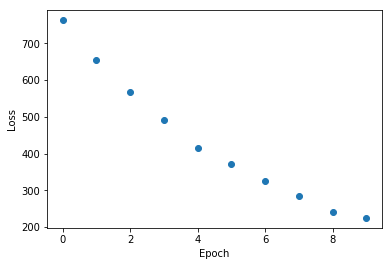

In [16]:
import matplotlib.pyplot as plot

plot.ylabel("Loss")
plot.xlabel("Epoch")
x = range(num_epochs)
y = losses
plot.scatter(x, y)
plot

In [17]:
metric = dc.metrics.Metric(
    dc.metrics.roc_auc_score, np.mean, mode="classification")

print("Evaluating model")
train_scores = model.evaluate(train_dataset, [metric], transformers)
print("Training ROC-AUC Score: %f" % train_scores["mean-roc_auc_score"])
valid_scores = model.evaluate(valid_dataset, [metric], transformers)
print("Validation ROC-AUC Score: %f" % valid_scores["mean-roc_auc_score"])

Evaluating model
computed_metrics: [0.9783949476278496, 0.9459570987495118, 0.9995309128436064, 0.9634003256233974, 0.9707884522076663, 0.9598211369130147, 0.9808109889683786, 0.9968324537445838, 0.9296943400612094, 0.9772674146797569, 0.995893795591811, 0.9671431619372732, 0.9944224147366116, 0.9983572774375882, 0.9617965926690759, 0.9732665253796546, 0.9723498888065233, 0.9965543221658546, 0.94927455149006, 0.9590236506973924, 0.958046358373567, 0.9629808815188015, 0.9991910277624563, 0.9752243512752761, 0.9746162884629507, 0.976774322169059, 0.9446056085094626]
Training ROC-AUC Score: 0.972667
computed_metrics: [0.6928401898734178, 0.574964639321075, 0.6901408450704225, 0.528388644542183, 0.6701728024042073, 0.5914786967418547, 0.6323366555924695, 0.5261016949152543, 0.6294326241134752, 0.5899252262888626, 0.6097972972972973, 0.5984848484848485, 0.6169467787114846, 0.5455284552845528, 0.5575221238938053, 0.6452263558942178, 0.6072834645669292, 0.6088992974238876, 0.6086046511627907,

In [18]:
model = GraphConvModel(
    len(sider_tasks), batch_size=50, mode='classification')
# Set nb_epoch=10 for better results.
model.fit(train_dataset, nb_epoch=15)

/home/mamonteiro/anaconda3/envs/lei_deepchem_python36/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


728.8147823610168

In [19]:
metric = dc.metrics.Metric(
    dc.metrics.roc_auc_score, np.mean, mode="classification")

print("Evaluating model")
train_scores = model.evaluate(train_dataset, [metric], transformers)
print("Training ROC-AUC Score: %f" % train_scores["mean-roc_auc_score"])

valid_scores = model.evaluate(valid_dataset, [metric], transformers)
print("Validation ROC-AUC Score: %f" % valid_scores["mean-roc_auc_score"])

Evaluating model
computed_metrics: [0.789177449168207, 0.7273169401725778, 0.9975138380711136, 0.7590980100059983, 0.7653639010189228, 0.7588070470894823, 0.8202514589270828, 0.8076267531880814, 0.7310773641188548, 0.7882126424054525, 0.8034630167071928, 0.7485865158950289, 0.8240598085520168, 0.8296455487517664, 0.7266980046916465, 0.802737219159559, 0.7897084259945639, 0.7996634687829626, 0.7118943717131029, 0.7373296947645037, 0.7464018488433288, 0.7654499349371059, 0.8728075013789299, 0.718758661468246, 0.750866563854006, 0.8491925837320575, 0.7190841276419395]
Training ROC-AUC Score: 0.782992
computed_metrics: [0.6787974683544304, 0.6324846770391325, 0.8169014084507042, 0.5707716913234706, 0.6998497370398197, 0.5142857142857142, 0.7214839424141749, 0.6305084745762712, 0.5234929078014184, 0.633215269578906, 0.6503378378378378, 0.6294765840220387, 0.5896358543417367, 0.6455284552845528, 0.5707964601769913, 0.7037203047960556, 0.6983267716535433, 0.5140515222482436, 0.590697674418604

# Another Implementation GraphConvModel

In [21]:
from deepchem.models.tensorgraph.tensor_graph import TensorGraph

tg = TensorGraph(use_queue=False)

In [22]:
from deepchem.models.tensorgraph.layers import Feature

atom_features = Feature(shape=(None, 75))
degree_slice = Feature(shape=(None, 2), dtype=tf.int32)
membership = Feature(shape=(None,), dtype=tf.int32)

deg_adjs = []
for i in range(0, 10 + 1):
    deg_adj = Feature(shape=(None, i + 1), dtype=tf.int32)
    deg_adjs.append(deg_adj)

In [23]:
from deepchem.models.tensorgraph.layers import Dense, GraphConv, BatchNorm
from deepchem.models.tensorgraph.layers import GraphPool, GraphGather

batch_size = 50

gc1 = GraphConv(
    64,
    activation_fn=tf.nn.relu,
    in_layers=[atom_features, degree_slice, membership] + deg_adjs)
batch_norm1 = BatchNorm(in_layers=[gc1])
gp1 = GraphPool(in_layers=[batch_norm1, degree_slice, membership] + deg_adjs)
gc2 = GraphConv(
    64,
    activation_fn=tf.nn.relu,
    in_layers=[gp1, degree_slice, membership] + deg_adjs)
batch_norm2 = BatchNorm(in_layers=[gc2])
gp2 = GraphPool(in_layers=[batch_norm2, degree_slice, membership] + deg_adjs)
dense = Dense(out_channels=128, activation_fn=tf.nn.relu, in_layers=[gp2])
batch_norm3 = BatchNorm(in_layers=[dense])
readout = GraphGather(
    batch_size=batch_size,
    activation_fn=tf.nn.tanh,
    in_layers=[batch_norm3, degree_slice, membership] + deg_adjs)

In [24]:
from deepchem.models.tensorgraph.layers import Dense, SoftMax, \
    SoftMaxCrossEntropy, WeightedError, Stack
from deepchem.models.tensorgraph.layers import Label, Weights

costs = []
labels = []
for task in range(len(sider_tasks)):
    classification = Dense(
        out_channels=2, activation_fn=None, in_layers=[readout])

    softmax = SoftMax(in_layers=[classification])
    tg.add_output(softmax)

    label = Label(shape=(None, 2))
    labels.append(label)
    cost = SoftMaxCrossEntropy(in_layers=[label, classification])
    costs.append(cost)
all_cost = Stack(in_layers=costs, axis=1)
weights = Weights(shape=(None, len(sider_tasks)))
loss = WeightedError(in_layers=[all_cost, weights])
tg.set_loss(loss)

In [25]:
from deepchem.metrics import to_one_hot
from deepchem.feat.mol_graphs import ConvMol

def data_generator(dataset, epochs=1, predict=False, pad_batches=True):
  for epoch in range(epochs):
    if not predict:
        print('Starting epoch %i' % epoch)
    for ind, (X_b, y_b, w_b, ids_b) in enumerate(
        dataset.iterbatches(
            batch_size, pad_batches=pad_batches, deterministic=True)):
      d = {}
      for index, label in enumerate(labels):
        d[label] = to_one_hot(y_b[:, index])
      d[weights] = w_b
      multiConvMol = ConvMol.agglomerate_mols(X_b)
      d[atom_features] = multiConvMol.get_atom_features()
      d[degree_slice] = multiConvMol.deg_slice
      d[membership] = multiConvMol.membership
      for i in range(1, len(multiConvMol.get_deg_adjacency_lists())):
        d[deg_adjs[i - 1]] = multiConvMol.get_deg_adjacency_lists()[i]
      yield d

In [27]:
# Epochs set to 1 to render tutorials online.
# Set epochs=10 for better results.
tg.fit_generator(data_generator(train_dataset, epochs=1))

Starting epoch 0


804.3340825619905

In [18]:
# Epochs set to 1 to render tutorials online.
# Set epochs=10 for better results.
tg.fit_generator(data_generator(train_dataset, epochs=10))

Starting epoch 0
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9


633.0344035273013

In [19]:
metric = dc.metrics.Metric(
    dc.metrics.roc_auc_score, np.mean, mode="classification")

def reshape_y_pred(y_true, y_pred):
    """
    TensorGraph.Predict returns a list of arrays, one for each output
    We also have to remove the padding on the last batch
    Metrics taks results of shape (samples, n_task, prob_of_class)
    """
    n_samples = len(y_true)
    retval = np.stack(y_pred, axis=1)
    return retval[:n_samples]


print("Evaluating model")
train_predictions = tg.predict_on_generator(data_generator(train_dataset, predict=True))
train_predictions = reshape_y_pred(train_dataset.y, train_predictions)
train_scores = metric.compute_metric(train_dataset.y, train_predictions, train_dataset.w)
print("Training ROC-AUC Score: %f" % train_scores)

valid_predictions = tg.predict_on_generator(data_generator(valid_dataset, predict=True))
valid_predictions = reshape_y_pred(valid_dataset.y, valid_predictions)
valid_scores = metric.compute_metric(valid_dataset.y, valid_predictions, valid_dataset.w)
print("Valid ROC-AUC Score: %f" % valid_scores)

Evaluating model
computed_metrics: [0.8175569932224276, 0.7561805949582556, 0.9984520123839009, 0.7817598164907817, 0.8211572052401745, 0.7765590632916906, 0.8505254076271351, 0.8735137688153274, 0.7592724596133731, 0.8393248197632932, 0.8356106361283238, 0.8128600384040964, 0.8627030030560958, 0.8906735751295336, 0.7888034489941943, 0.8240212840649053, 0.8436743266617246, 0.8341252699784016, 0.7668606169109693, 0.7709015564988883, 0.7984005674667642, 0.7880551199492842, 0.9359808788380217, 0.7942366205337621, 0.7990957993684364, 0.8766547049441786, 0.7520652023760188]
Training ROC-AUC Score: 0.824038
computed_metrics: [0.7227056962025316, 0.607967939651108, 0.5633802816901409, 0.6379448220711714, 0.7141247182569497, 0.5453634085213033, 0.6943521594684385, 0.6261016949152542, 0.5673758865248227, 0.613931523022432, 0.606418918918919, 0.5426997245179063, 0.5458683473389356, 0.6028455284552845, 0.5884955752212389, 0.6857911250560287, 0.6840551181102362, 0.6311475409836065, 0.6127906976744


# Comparision of Results with MoleculeNet results